# What happens to the placement of prime numbers in unfounded expressions?

## No.5 三次元空間にプロットしてみる その4

先のページでは、複素平面をベクトル$(x, y)$に直交するように配置しましたが、今回はベクトルと同じ直線上にxy平面と直交するように配置してプロットする点を移動させます。  

![plot Image NO.3](./img/pict_no3.jpg)

### 例によって共通の関数  

最初にこのセルを実行しておいて下さい

In [1]:
import numpy as np

def choice_prime_num(arr):
    if isinstance(arr, np.ndarray):
        arr = arr.tolist()
    if 0 in arr:
        arr.remove(0)
    if 1 in arr:
        arr.remove(1)
    prime = []
    _min = min(arr)
    _max = max(arr)
    while _min <= np.sqrt(_max):
        _min = min(arr)
        prime.append(_min)
        for i in arr:
            if i != _min and i % _min == 0:
                arr.remove(i)
        arr.remove(_min)
    prime.extend(arr)

    return prime

def divied_colors(size, prime_num):
    colors = []
    for num in range(len(size)):
        if num in prime_num:
            colors.append('red')
        elif num % 2 == 0:
            colors.append('darkslateblue')
        else:
            colors.append('mediumseagreen')
    return colors

def make_plot_arr(arr1, arr2, t):
    grad = np.sqrt(arr1[0]**2 + arr1[1]**2)
    arr = np.array([grad  + (arr2[0] * np.cos(t)), 0, (arr2[1] * np.sin(t))])
    matrix = np.array([
        [np.cos(t), np.sin(t), 0],
        [-np.sin(t), np.cos(t), 0],
        [0, 0, 1]
    ])
    res =  matrix.dot(arr)
    return res


### 試してみる  


先のファイルから`make_plot_arr`関数の内容が少し変わっていますが、他は同じですので、早速、プロットしてみます。


In [2]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def plot3d_05(int_range, prime_num, rad):
    colors = divied_colors(int_range, prime_num)

    theta = rad* int_range
    comp =  1 - 1j ** (np.e * int_range)

    ax1_x = np.cos(theta) * int_range
    ax1_y = np.sin(theta) * int_range
    ax1 = np.stack([ax1_x, ax1_y]).T
    
    ax2_x = comp.real * int_range
    ax2_y = comp.imag  * int_range
    ax2 = np.stack([ax2_x, ax2_y]).T
    
    res = []
    for a1, a2, t in zip(ax1, ax2, theta):
        res.append(make_plot_arr(a1, a2, t))
    
    arr = np.array(res).T
    
    fig = plt.figure(figsize=(5, 5))
    ax = Axes3D(fig)
    ax.set_facecolor('Gainsboro')
    ax.scatter(arr[0], arr[1], arr[2], s=3, c=colors)



まず $rad = \frac{e \pi}{2}$

<IPython.core.display.Javascript object>


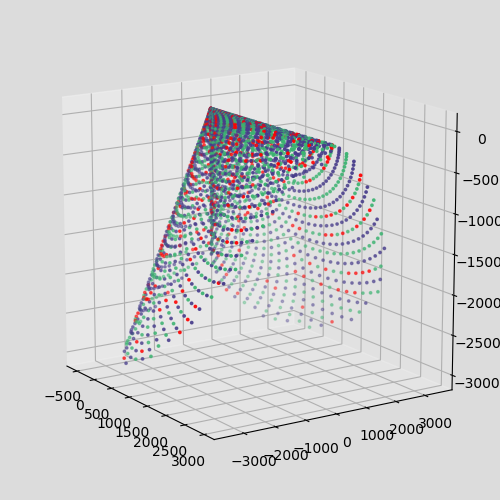

In [3]:
INT_RANGE = np.arange(1, 3000)
PRIME_NUM = np.array(choice_prime_num(INT_RANGE))

rad = (np.e / 2) * np.pi 
plot3d_05(INT_RANGE, PRIME_NUM, rad)

これまた、面白い形になりました。
実は今回も$rad = \frac{e \pi}{2}$は、他の$radの値とはちょっと違う型になります

次は$rad = \frac{2 \pi^{e}}{e^{-2 \pi}}$

<IPython.core.display.Javascript object>


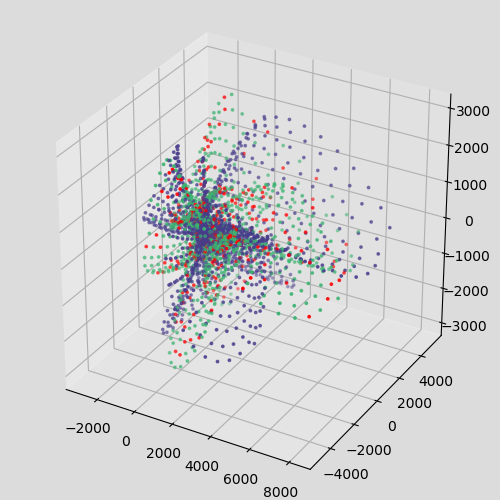

In [4]:
rad = (2 * np.pi**np.e) / (np.e**(-2 * np.pi)) 
plot3d_05(INT_RANGE, PRIME_NUM, rad)

何となく蝶々っぽいです。  

続いて$rad = \frac{e^{2 \pi}}{2 \pi^{e}}$

<IPython.core.display.Javascript object>


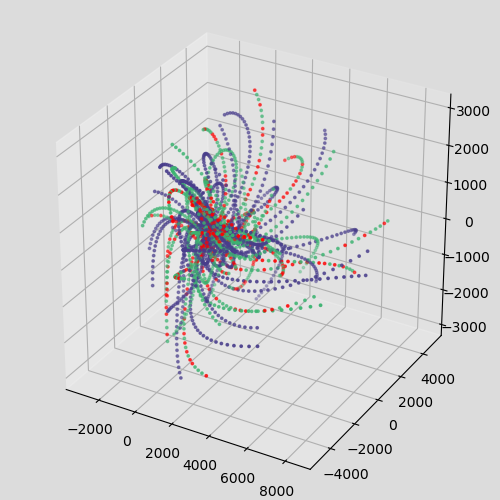

In [5]:
# Try switching "rad".

# rad = np.exp(-np.pi)
#rad = np.e
# rad = (np.pi**np.e) / (np.e**(-np.pi))
#rad = (2 * np.pi) / np.e**2
#rad = np.e / (2 * np.pi)
#rad = np.e**(np.pi) / (np.pi**np.e) ##
rad = np.e**(2 * np.pi) / (2 * np.pi**np.e) ##
#rad = 2 / (np.e*np.pi)
#rad = np.pi**np.e
#rad = 2**np.e*np.pi
#rad = (2*np.e)**np.pi

## おまけ
#rad = np.pi / 2
plot3d_05(INT_RANGE, PRIME_NUM, rad)

この$rad$の値はヒモ状になりますね。  




## 少し手を加えてみる  

といっても  
```
ax2_x = comp.real * int_range
ax2_y = comp.imag  * int_range
```  
を

```
ax2_x = comp.real
ax2_y = comp.imag
```  
としてみるだけです。
つまり、複素平面での回転の半径は変化させないようにしてみます。  

このパターンは、真上（z軸方向）からの視点に近づくにつれ、元となっている渦巻き形が現れてくる、その過程が楽しいです。  
（ぜひお試しあれ）  
ただ、残念ながら一部を除いて、特に変化のない型になってしまいます。


In [6]:
def plot3d_06(int_range, prime_num, rad):
    colors = divied_colors(int_range, prime_num)

    theta = rad* int_range
    comp =  1 - 1j ** (np.e * int_range)

    ax1_x = np.cos(theta) * int_range
    ax1_y = np.sin(theta) * int_range
    ax1 = np.stack([ax1_x, ax1_y]).T
    
    ax2_x = comp.real
    ax2_y = comp.imag
    ax2 = np.stack([ax2_x, ax2_y]).T
    
    res = []
    for a1, a2, t in zip(ax1, ax2, theta):
        res.append(make_plot_arr(a1, a2, t))
    
    arr = np.array(res).T
    
    fig = plt.figure(figsize=(5, 5))
    ax = Axes3D(fig)
    ax.set_facecolor('Gainsboro')
    ax.scatter(arr[0], arr[1], arr[2], s=3, c=colors)


例によって、まず $rad = \frac{e \pi}{2}$から

<IPython.core.display.Javascript object>


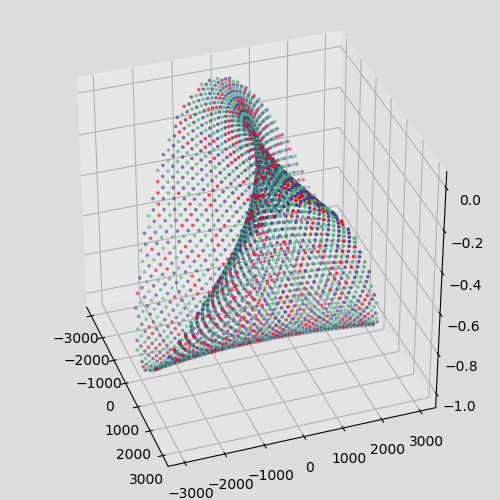

In [7]:
INT_RANGE = np.arange(1, 3000)
PRIME_NUM = np.array(choice_prime_num(INT_RANGE))

rad = (np.e / 2) * np.pi 
plot3d_06(INT_RANGE, PRIME_NUM, rad)

いいですね！  
個人的には造形として結構好きです。  
3Dプリンターがあれば作ってみたいところです。  

次は$rad = \frac{2 \pi^{e}}{e^{-2 \pi}}$

<IPython.core.display.Javascript object>


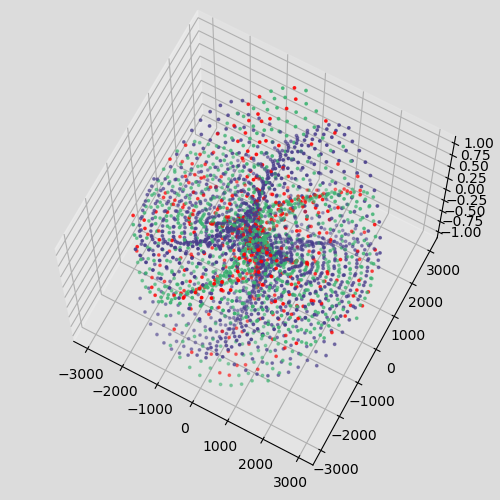

In [8]:
rad = (2 * np.pi**np.e) / (np.e**(-2 * np.pi)) 
plot3d_06(INT_RANGE, PRIME_NUM, rad)


次はやっぱりヒモ状になる$rad = \frac{e^{2 \pi}}{2 \pi^{e}}$（笑）  

興味があれば$rad$の値を他のものに切り替えたり、各数値を替えてみたりして、遊んでみて下さい。

<IPython.core.display.Javascript object>


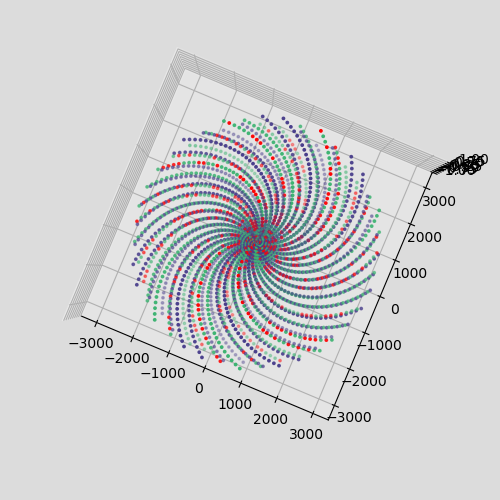

In [9]:
# Try switching "rad".

# rad = np.exp(-np.pi)
#rad = np.e
#rad = (np.pi**np.e) / (np.e**(-np.pi))
#rad = (2 * np.pi) / np.e**2
#rad = np.e / (2 * np.pi)
#rad = np.e**(np.pi) / (np.pi**np.e) ##
rad = np.e**(2 * np.pi) / (2 * np.pi**np.e) ##
#rad = 2 / (np.e*np.pi)
#rad = np.pi**np.e
#rad = 2**np.e*np.pi
#rad = (2*np.e)**np.pi

## おまけ
#rad = np.pi / 2
plot3d_06(INT_RANGE, PRIME_NUM, rad)

# アレコレやってきたけど、結局のところ  

分かっちゃいたけど、コレ！といった発見は無かったです。  
…というか、途中から素数の並び方云々より、整数全体が面白い並び方をするパターン探しに重点を置いていたしな、オレ（笑）  

とは言え、見る人が見ればもしかしたら…いや、もしかしないだろ!（苦笑）

そもそも素数の並び方に法則を見つけるには(法則があったとしても）３次元じゃ次元が足りないのかも知れないし、円周率やらネイピア数のような、この世の根源的な**数**は、素人がアレコレやてみたところで、そうやすやすと**尻尾を出す**ようなものではないのでしょう。  

まあでも**お遊び**としてはなかなか面白かったです。

次のファイルには、アレコレやっていた中で出現した、面白いパターン...だけど素数、整数の並び方とは全然関係ない**オマケ**、を表示させておきます。  

興味あればコチラもアレコレ手を加えて遊んでみて下さい。